In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img1 = cv2.imread('mycard.jpg', 0)          # queryImage
img2 = cv2.imread('id_template.jpg', 0) # trainImage

# Initiate SIFT detector
orb = cv2.ORB_create()

In [2]:
# find the keypoints and descriptors with SIFT
kp1, des1 = orb.detectAndCompute(img1,None)
kp2, des2 = orb.detectAndCompute(img2,None)

# create BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# Match descriptors.
matches = bf.match(des1,des2)

# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)

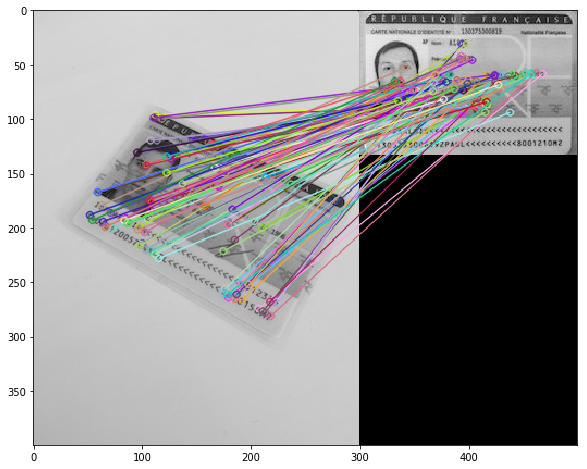

In [4]:
# Draw first 10 matches.
img3 = cv2.drawMatches(img1,kp1,img2,kp2,matches, None, flags=2)

plt.figure(figsize=(12,8))
plt.imshow(img3)
plt.show()

In [3]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

MIN_MATCH_COUNT = 10

img1 = cv2.imread('mycard.jpg', 0)          # queryImage
img2 = cv2.imread('id_template.jpg', 0) # trainImage

# Initiate SIFT detector
sift = cv2.SIFT()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks = 50)

flann = cv2.FlannBasedMatcher(index_params, search_params)

matches = flann.knnMatch(des1,des2,k=2)

good = []
for m,n in matches:
    if m.distance < 0.7*n.distance:
        good.append(m)

AttributeError: module 'cv2.cv2' has no attribute 'SIFT'

In [9]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img_rgb = cv2.imread('mycard.jpg', 0)
print(img_rgb.shape)

img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
template = cv2.imread('id_template.jpg',0)
print(template.shape)

w, h = template.shape[::-1]

res = cv2.matchTemplate(img_gray,template,cv2.TM_CCOEFF_NORMED)
threshold = 0.11
loc = np.where( res >= threshold)

for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 0)

plt.imshow(img_rgb)
plt.show()

(400, 300)


error: OpenCV(4.0.0) /Users/travis/build/skvark/opencv-python/opencv/modules/imgproc/src/color.hpp:259: error: (-2:Unspecified error) in function 'cv::CvtHelper<cv::Set<3, 4, -1>, cv::Set<1, -1, -1>, cv::Set<0, 2, 5>, cv::SizePolicy::NONE>::CvtHelper(InputArray, OutputArray, int) [VScn = cv::Set<3, 4, -1>, VDcn = cv::Set<1, -1, -1>, VDepth = cv::Set<0, 2, 5>, sizePolicy = cv::SizePolicy::NONE]'
> Invalid number of channels in input image:
>     'VScn::contains(scn)'
> where
>     'scn' is 1
